
# FrozenLake Environment Exploration with Reinforcement Learning

Pablo Quiroz Apud

This project demonstrates the application of reinforcement learning techniques on the "FrozenLake" environment 
from OpenAI Gym. The objective is to train an agent to navigate the slippery FrozenLake to reach the goal 
while avoiding holes.

## Objectives:
1. Understand the structure of the FrozenLake environment.
2. Implement a reinforcement learning algorithm (e.g., Q-learning).
3. Evaluate the agent's performance and visualize results.
    

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt


## Environment Setup

Here we import necessary libraries and set up the FrozenLake environment. We also define important 
parameters for the experiment, including the state and action spaces.
    

In [2]:
pip install gym[toy_text]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
env = gym.make("FrozenLake-v1", is_slippery=True)
n_observations = env.observation_space.n
n_actions = env.action_space.n


## Methodology

In this section, we implement the reinforcement learning algorithm. We'll focus on Q-learning to train
an agent that learns an optimal policy through iterative updates.

### Key Steps:
1. Initialize the Q-table.
2. Define a reward structure.
3. Use an epsilon-greedy strategy for action selection.
4. Update the Q-table based on rewards and transitions.
    

In [4]:
#Initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
n_episodes = 50000
max_iter_episode = 100
exploration_proba = 1.0
min_exploration_proba = 0.01
exploration_decreasing_decay = 0.001
lr = 0.8
gamma = 0.95
rewards_per_episode = []

# Initialize Q-table
Q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Initialize variables for tracking average return over last 50 episodes
avg_returns = []
window_size = 50
total_return = 0

for e in range(n_episodes):
    #we initialize the first state of the episode
    current_state, info = env.reset()
    done = False
    
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode): 
        # we sample a float from a uniform distribution over 0 and 1
        # if the sampled float is less than the exploration proba
        #     the agent selects a random action
        # else
        #     he exploits his knowledge using the bellman equation 
        
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
            
        # The environment runs the chosen action and returns
        # the next state, a reward and true if the episode is ended.
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        # We update our Q-table using the Q-learning iteration
        Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] + lr*(reward + gamma*max(Q_table[next_state,:]))
        total_episode_reward += reward
        
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state
        
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    
    # Record episode return and add it to the total return
    rewards_per_episode.append(total_episode_reward)
    total_return += total_episode_reward
    
    # If we have completed enough episodes to compute an average return over the last 50 episodes
    if e >= window_size:
        # Subtract the oldest return from the total return
        total_return -= rewards_per_episode[e - window_size]
        # Compute the average return over the last 50 episodes
        avg_return = total_return / window_size
        # Add the average return to our list of average returns
        avg_returns.append(avg_return)
    
    # Print the current episode number and average return over the last 50 episodes every 1000 episodes
    if (e+1) % 1000 == 0:
        print("Episode: ", e+1, " Avg Return (last 50): ", avg_returns[-1])



Episode:  1000  Avg Return (last 50):  0.04
Episode:  2000  Avg Return (last 50):  0.18
Episode:  3000  Avg Return (last 50):  0.26
Episode:  4000  Avg Return (last 50):  0.4
Episode:  5000  Avg Return (last 50):  0.56
Episode:  6000  Avg Return (last 50):  0.56
Episode:  7000  Avg Return (last 50):  0.62
Episode:  8000  Avg Return (last 50):  0.42
Episode:  9000  Avg Return (last 50):  0.56
Episode:  10000  Avg Return (last 50):  0.4
Episode:  11000  Avg Return (last 50):  0.48
Episode:  12000  Avg Return (last 50):  0.5
Episode:  13000  Avg Return (last 50):  0.36
Episode:  14000  Avg Return (last 50):  0.3
Episode:  15000  Avg Return (last 50):  0.3
Episode:  16000  Avg Return (last 50):  0.56
Episode:  17000  Avg Return (last 50):  0.3
Episode:  18000  Avg Return (last 50):  0.7
Episode:  19000  Avg Return (last 50):  0.5
Episode:  20000  Avg Return (last 50):  0.38
Episode:  21000  Avg Return (last 50):  0.56
Episode:  22000  Avg Return (last 50):  0.38
Episode:  23000  Avg Return


## Results and Analysis

Here we evaluate the trained agent's performance. We visualize key metrics, such as the learning curve
and the success rate, to understand the efficacy of the training process.
    

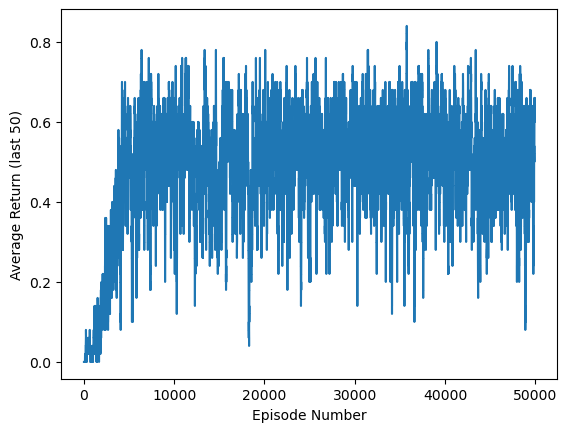

In [6]:
# Plot the average return over the last 50 episodes vs episode number
plt.plot(avg_returns)
plt.xlabel("Episode Number")
plt.ylabel("Average Return (last 50)")
plt.show()


In [7]:

print("Mean reward per thousand episodes")
for i in range(10):
    print((i+1)*1000, ": mean episode reward: ", np.mean(rewards_per_episode[1000*i:1000*(i+1)]))


Mean reward per thousand episodes
1000 : mean episode reward:  0.027
2000 : mean episode reward:  0.077
3000 : mean episode reward:  0.189
4000 : mean episode reward:  0.338
5000 : mean episode reward:  0.456
6000 : mean episode reward:  0.432
7000 : mean episode reward:  0.535
8000 : mean episode reward:  0.502
9000 : mean episode reward:  0.53
10000 : mean episode reward:  0.524



## Conclusion

The project showcases the use of reinforcement learning for solving the FrozenLake environment. The 
results highlight the challenges of working with stochastic environments and the importance of 
tuning hyperparameters. Future work could explore other RL algorithms, such as Deep Q-Networks (DQN), 
or experiment with custom reward structures.
    